In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import matplotlib.ticker as ticker
import scipy
# import the lib we need later

Problem 1

a)

According to the derivation in class, we can know that
$$
\langle F \rangle = \langle G \frac{M_1 M_2}{r^2} \rangle = G \frac{\langle M_1 \rangle \langle M_2 \rangle}{\langle r \rangle^2} \\

{\rm Var}(F) = {\rm Var}(G \frac{M_1 M_2}{r^2}) = 
\frac{\partial F}{\partial M_1}|_{\langle M_1 \rangle,\langle M_2 \rangle,\langle r \rangle}^2 \sigma_{M_1}^2+ 
\frac{\partial F}{\partial M_2}|_{\langle M_1 \rangle,\langle M_2 \rangle,\langle r \rangle}^2 \sigma_{M_2}^2
\frac{\partial F}{\partial r}|_{\langle M_1 \rangle, \langle M_2 \rangle, \langle r \rangle}^2 \sigma_{r}^2 \\

= (G\frac{\langle M_2 \rangle}{\langle r \rangle^2})^2 \sigma_{M_1}^2
+ (G\frac{\langle M_1 \rangle}{\langle r \rangle^2})^2 \sigma_{M_2}^2+ 
(-2G\frac{\langle M_1 \rangle \langle M_2 \rangle}{\langle r \rangle^3})^2 \sigma_{r}^2 \\

\sigma _{F} = \sqrt{(G\frac{\langle M_2 \rangle}{\langle r \rangle^2})^2 \sigma_{M_1}^2+ (G\frac{\langle M_1 \rangle}{\langle r \rangle^2})^2 \sigma_{M_2}^2+ (-2G\frac{\langle M_1 \rangle \langle M_2 \rangle}{\langle r \rangle^3})^2 \sigma_{r}^2}
$$

In [15]:
# b)

M_1_mean = 400000
M_1_sigma = 500
M_2_mean = 300000
M_2_sigma = 1000
r_mean = 3.2
r_sigma = 0.001
G_constant = 6.67430*10**(-11)
# get values

F_mean = G_constant*M_1_mean*M_2_mean/(r_mean*r_mean)
F_sigma = np.sqrt(((G_constant*M_2_mean/(r_mean**2))**2)*M_1_sigma**2 + ((G_constant*M_1_mean/(r_mean**2))**2)*M_2_sigma**2 + ((-2*G_constant*M_1_mean*M_2_mean/(r_mean**3))**2)*r_sigma**2)
# calculate the mean and standard divation by analytical method

print(F_mean,F_sigma)
# print the values to the screen

0.7821445312499998 0.0028270209278073626


0.7821472581815603 0.0028285724904356067


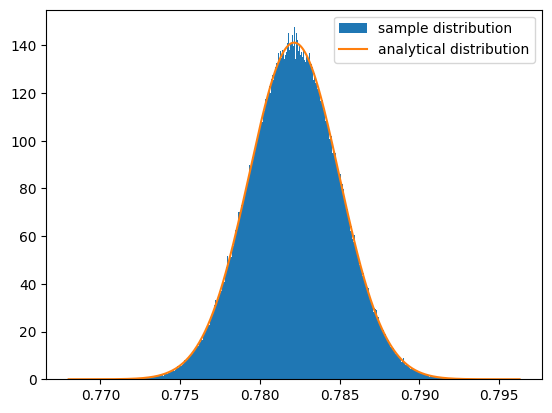

In [16]:
# c)

import scipy.stats


def generateF(M1mean,M1std,M2mean,M2std,rmean,rstd,samplesize):
    # create a function to calculate the smaple of F
    M1sample = np.random.normal(M1mean,M1std,samplesize)
    M2sample = np.random.normal(M2mean,M2std,samplesize)
    rsample = np.random.normal(rmean,rstd,samplesize)
    # create the array for the sample
    G = 6.67430e-11
    # set the constant
    Fsample = G*M1sample*M2sample/(rsample**2)
    return Fsample

sample = generateF(M_1_mean,M_1_sigma,M_2_mean,M_2_sigma,r_mean,r_sigma,1000000)
# create the sample of F
plt.hist(sample,1000,density=True,label='sample distribution')
# plot the histogram as asked
x_range = np.linspace(F_mean-5*F_sigma,F_mean+5*F_sigma,1000)
distribution = scipy.stats.norm.pdf(x_range,F_mean,F_sigma)
# create points of the distribution from the analytical solution
plt.plot(x_range,distribution,label='analytical distribution')
# plot the diagram
plt.legend()
# show legend
print(sample.mean(),sample.std())
# print the mean and standard divation of sample

the analytical result matches the simulation result very well, since they have very close mean and standard diviation and also looks similar on the graph.

0.7821445312499998 0.36737903954974716
0.8847634712371081 0.5310267457713005


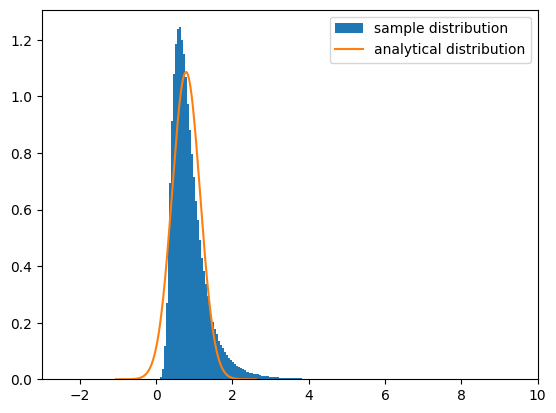

In [17]:
# d)

M_1_mean = 400000
M_1_sigma = 80000
M_2_mean = 300000
M_2_sigma = 60000
r_mean = 3.2
r_sigma = 0.6
# create the new values

F_mean = G_constant*M_1_mean*M_2_mean/(r_mean*r_mean)
F_sigma = np.sqrt(((G_constant*M_2_mean/(r_mean**2))**2)*M_1_sigma**2 + ((G_constant*M_1_mean/(r_mean**2))**2)*M_2_sigma**2 + ((-2*G_constant*M_1_mean*M_2_mean/(r_mean**3))**2)*r_sigma**2)
# calculate the mean and standard divation by analytical method

print(F_mean,F_sigma)
# print the values to the screen

sample = generateF(M_1_mean,M_1_sigma,M_2_mean,M_2_sigma,r_mean,r_sigma,1000000)
# create the sample of F
plt.hist(sample,1000,density=True,label='sample distribution')
# plot the histogram as asked
x_range = np.linspace(F_mean-5*F_sigma,F_mean+5*F_sigma,1000)
distribution = scipy.stats.norm.pdf(x_range,F_mean,F_sigma)
# create points of the distribution from the analytical solution
plt.plot(x_range,distribution,label='analytical distribution')
# plot the diagram
plt.xlim(-3,10)
# create a limt in x to show the graph clearly
plt.legend()
# show legend
print(sample.mean(),sample.std())
# print the mean and standard divation of sample


They do not agree very well this time. The mean and standard divation of the stimulation are larger than the ones we get through analytical result. What is more, the simulation have a very large amount of data shows up in range more than  10. From two ways to stimulation, I believe in the stiumaltion more, since hte analytical result have resutl smaller than 0, which is impossible in force.

e)


According to the defination shown in the promt, we know that the rules of varance and mean can be applied here.

$$

\log_{10} F = \log_{10} G\frac{M_1 M_2}{r^2} = \log_{10} G + \log_{10} M_1 + \log_{10} M_2 -2 \log_{10} r \\

\langle \log_{10} F \rangle = \langle \log_{10} G + \log_{10} M_1 + \log_{10} M_2 -2 \log_{10} r \rangle \\

= \langle \log_{10} G \rangle + \langle \log_{10} M_1 \rangle + \langle \log_{10} M_2 \rangle -2 \langle \log_{10} r \rangle \\


{\rm Var}(\log_{10} F) = {\rm Var}(\log_{10} G + \log_{10} M_1 + \log_{10} M_2 -2 \log_{10} r)\\

{\rm Var}(\log_{10} G) = 0 \\

{\rm Var}(\log_{10} F) = {\rm Var}(\log_{10} M_1) + {\rm Var}(\log_{10} M_2) + 4{\rm Var}(\log_{10} r) \\

= \sigma_{\log_{10} M_1}^2 + \sigma_{\log_{10} M_2}^2 + 4 \sigma_{\log_{10} r}^2 \\

\sigma_{\log_{10} F} = \sqrt{\sigma_{\log_{10} M_1}^2 + \sigma_{\log_{10} M_2}^2 + 4 \sigma_{\log_{10} r}^2}

$$

Due to uncertainty propagation for a nonlinear function we can know that

$$

\langle \log_{10} M_1 \rangle \simeq \log_{10}(\langle M_1 \rangle/1kg) \quad

\langle \log_{10} M_2 \rangle \simeq \log_{10}(\langle M_2 \rangle/1kg) \quad

\langle \log_{10} r \rangle \simeq \log{10}(\langle r \rangle/1m) \\

\sigma_{\log_{10} M_1} \simeq \sqrt{(\frac{1}{\langle M_1 \rangle \ln(10)})^2 \sigma_{M_1}^2} 
= \frac{1}{\langle M_1 \rangle \ln(10)} \sigma_{M_1} \\

\sigma_{\log_{10} M_2} \simeq \sqrt{(\frac{1}{\langle M_2 \rangle \ln(10)})^2 \sigma_{M_2}^2} 
= \frac{1}{\langle M_2 \rangle \ln(10)} \sigma_{M_2} \\

\sigma_{\log_{10} r} \simeq \sqrt{(\frac{1}{\langle r \rangle \ln(10)})^2 \sigma_{r}^2} 
= \frac{1}{\langle r \rangle \ln(10)} \sigma_{r} \\

$$

we can get


$$

\langle \log_{10} F \rangle \simeq \log_{10}(G) + \log_{10}(\langle M_1 \rangle/1kg) + \log_{10}(\langle M_2 \rangle/1kg) - 2 \log_{10}(\langle r \rangle/1m) \\

\sigma_{\log_{10} F} \simeq \sqrt{(\frac{1}{\langle M_1 \rangle \ln(10)} \sigma_{M_1})^2 + (\frac{1}{\langle M_2 \rangle \ln(10)} \sigma_{M_2})^2 + 4 (\frac{1}{\langle r \rangle \ln(10)} \sigma_{r})^2}
$$

f)

$ \log_{10} F $ will looks like a gaussian distribution, since $ \log_{10} M_1, \log_{10} M_2 ,\log_{10} r $ are gaussian distritubion and  $ \log_{10} F$ is a linear combinatio of them

$$

P(\log_{10} F) = P(\log_{10} M_1) P(\log_{10} M_2) P(\log_{10} r)

$$

g)
$$

P(F) = P(\log_{10} F) | \frac{d(\log_{10} F)}{dF} | \\

\frac{d(\log_{10} F)}{dF} = \frac{1}{F \ln{10}} \\

P(F) = P(\log_{10} F) \frac{1}{F \ln{10}} 

$$

since we know that $ P(\log_{10} F) $ follows gaussian distribution

$$

P(\log_{10} F) = \frac{1}{\sqrt{2 \pi} \sigma_{\log_{10} F}} 
\exp{(- \frac{(\log_{10} (F) - \langle \log_{10} F \rangle)^2}{2 \sigma_{\log_{10} F}^2})} \\

P(F) = \frac{1}{F \ln{10} \sqrt{2 \pi} \sigma_{\log_{10} F}} 
\exp{(- \frac{(\log_{10} (F) - \langle \log_{10} F \rangle)^2}{2 \sigma_{\log_{10} F}^2})}

$$

In [20]:
# h)

logM1mean = 5.6
logM1std = 0.15
logM2mean = 5.5
logM2std = 0.15
logrmean = 0.5
logrstd = 0.2
# set up the values

logFmean = np.log10(G_constant) + logM1mean + logM2mean - 2*logrmean
logFstd = np.sqrt(logM1std**2 + logM2std**2 + 4*logrstd**2)
# compute with the method shown in e)

print(logFmean,logFstd)
# print the values to the screen

-0.07559427634224036 0.45276925690687087


-0.07502024171961183 0.45237360276222793


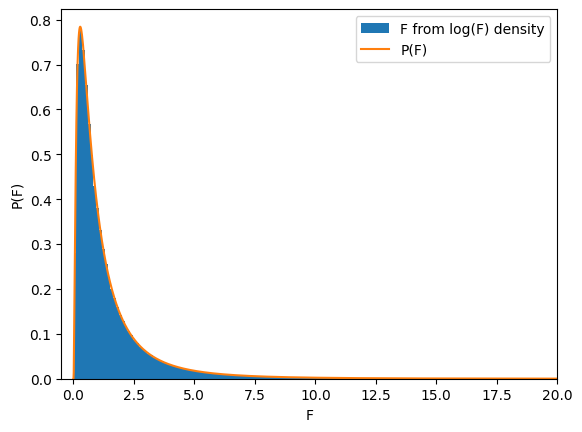

In [34]:
samplelogM1 = np.random.normal(logM1mean,logM1std,1000000)
samplelogM2 = np.random.normal(logM2mean,logM2std,1000000)
samplelogr = np.random.normal(logrmean,logrstd,1000000)
# creating samples for the log values
samplelogF = np.log10(G_constant)+samplelogM1+samplelogM2-2*samplelogr
# calculate the sample of log F
sample = 10**(samplelogF)
# calculate the sample F from log F
plt.hist(sample,1000,density=True,label='F from log(F) density')
# plot histogram of F from log F
x_range=np.linspace(20,0,1000000,endpoint=False)
# create the range of x without 0
PF = 1/(x_range * np.log(10) * np.sqrt(2*np.pi) * logFstd) *np.exp((-(np.log10(x_range) - logFmean)**2 / (2 * logFstd**2)))
# compute the value of P(F) by function derived eariler
plt.plot(x_range,PF,label='P(F)')
# plot the P(F) to the graph
plt.xlim(-0.5,20)
# limit the graph to a range to analysis easier
plt.xlabel('F')
plt.ylabel('P(F)')
# provide each axix a label
plt.legend()
# show legend
print(samplelogF.mean(),samplelogF.std())
# print the values of mean and std of log F computed from the sample


The values of mean and standard divation of the analytical result matches with the result from sample, the graph also mathced with each other.

Problem 2

$$

P(y) = 
\begin{cases} 
3y^2 & \text{for } 0 \leq y \leq 1. \\
0 & \text{otherwise}, 
\end{cases}
\\

CDF(y) = \int_{0}^{y} 3y^2 dy  = y^3 \text{ for } 0 \leq y \leq 1 \\

CDF^{-1}(y) = y^{\frac{1}{3}} \text{ for } 0 \leq y \leq 1

$$

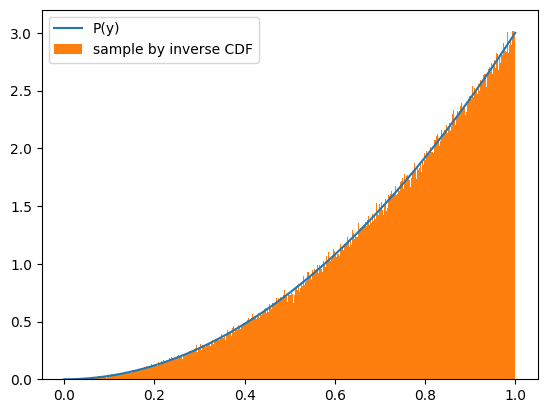

In [37]:
x_range = np.linspace(0,1,1000000)
# create the x range
y = 3*(x_range**2)
# calculate P(y)
plt.plot(x_range,y,label='P(y)')
sample = np.random.uniform(0,1,1000000)**(1/3)
# create the sample
plt.hist(sample,1000,density=True,label='sample by inverse CDF')
# plot the histogram from inverse CDF
plt.legend()